In [2]:
words  = open('names.txt', 'r').read().splitlines()
#  reading the text file
words[0:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [ ]:
a= [len(w) for w in words]


In [4]:
# trying bi-gram language model for the first word

# without hallucination
print ("\nwithout start and end character \n")
for ele in words[0:1]:
    for a,b in zip(ele,ele[1:]):
        print (a,b)


print ("\nwith start and end character \n")
# with hallucinatios
for ele in words[0:1]:
    full = ['<s>'] + list(ele) + ['<e>'] #this is to hallucinate to start and end the word
    for a,b in zip(full,full[1:]):
        print (a,b)



without start and end character 

e m
m m
m a

with start and end character 

<s> e
e m
m m
m a
a <e>


In [5]:
bi_count = {}

for ele in words:
    full = ['<s>'] + list(ele) + ['<e>'] #this is to hallucinate to start and end the word
    for a,b in zip(full,full[1:]):
        bi_count[(a,b)] = bi_count.get((a,b),0) + 1;
        # print (a,b)


# bi_count.items() will give us the tuple of key,value of dictionary
sorted(bi_count.items(),key = lambda k:-k[1])   #negative sign is to sort the values in descending order according to index 1
bi_count


{('<s>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<e>'): 6640,
 ('<s>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<s>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<s>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<s>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<s>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<e>'): 3983,
 ('<s>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<s>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<e>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<e>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [38]:
print(len(bi_count))

627


In [39]:
# pip install torch


below is for space optimization because no pair will start with end character and no pair will end with start character

In [6]:
s = sorted(list(set(''.join(words))))
print(s)
def str_to_int_28(all_characters):
    stoi_28 = {s:i+1 for i,s in enumerate(s)}
    stoi_28['<s>']=0
    stoi_28['<e>']=27
    return stoi_28

def str_to_int_27(all_characters):
    stoi_27 = {s:i+1 for i,s in enumerate(s)}
    stoi_27['.']=0
    return stoi_27

stoi_28 = str_to_int_28(s)
stoi_27 = str_to_int_27(s)

def int_to_str_28(stoi_28):
    itos_28= {i:s for s,i in stoi_28.items()}
    return itos_28

def int_to_str_27(stoi_27):
    itos_27= {i:s for s,i in stoi_27.items()}
    return itos_27

itos_28 = int_to_str_28(stoi_28)
itos_27 = int_to_str_27(stoi_27)


print(stoi_28)
print(stoi_27)
print(itos_28)
print(itos_27)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '<s>': 0, '<e>': 27}
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '<s>', 27: '<e>'}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: '

In [7]:
import torch

def make_count_array_27(words):
    count_array_27= torch.zeros((27,27),dtype=torch.int32) 
    for ele in words:
        full = ['.'] + list(ele) + ['.'] #this is to hallucinate to start and end the word
        for a,b in zip(full,full[1:]):
            count_array_27[stoi_27[a],stoi_27[b]] += 1
    return count_array_27

def make_count_array_28(words):
    count_array_28= torch.zeros((28,28),dtype=torch.int32) 
    for ele in words:
        full = ['<s>'] + list(ele) + ['<e>'] #this is to hallucinate to start and end the word
        for a,b in zip(full,full[1:]):
            count_array_28[stoi_28[a],stoi_28[b]] += 1
    return count_array_28
        
count_array_27 = make_count_array_27(words)
print(count_array_27)

count_array_28 = make_count_array_28(words)
print(count_array_28)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

table with dimension 27*27


table with dimension 28*28


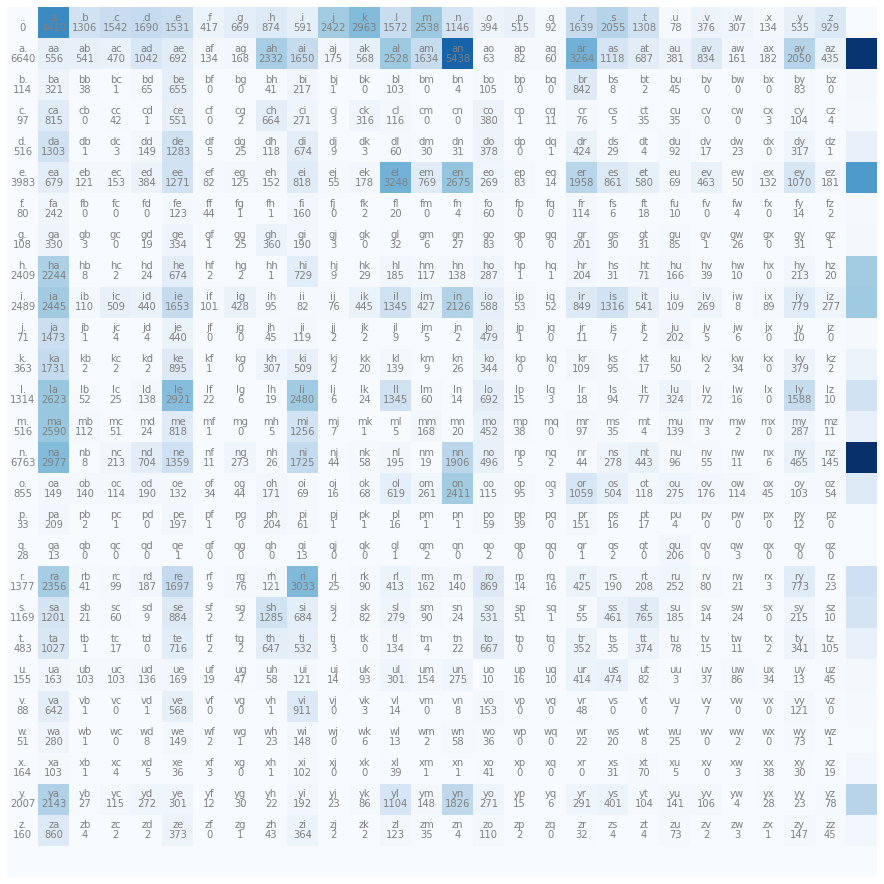

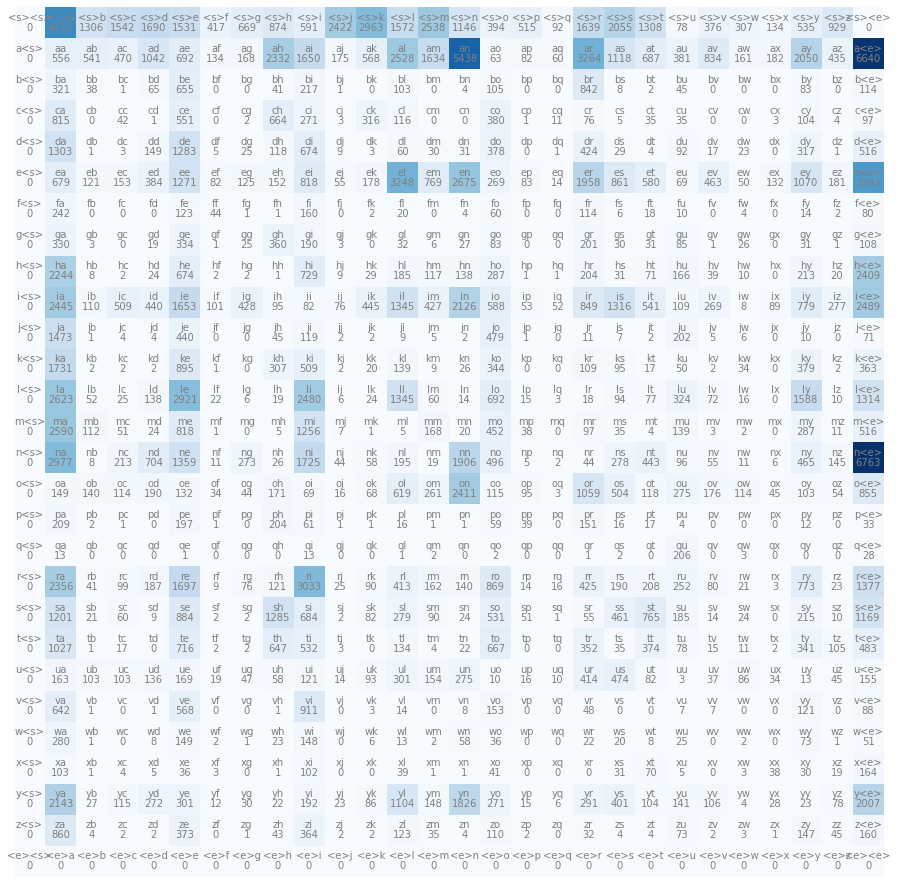

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def print_table_27(count_array_27):
    plt.figure(figsize=(16,16))
    plt.imshow(count_array_28, cmap='Blues')
    for i in range(27):
        for j in range(27):
            chstr =itos_27[i] + itos_27[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
            plt.text(j, i, count_array_27[i, j].item(), ha="center", va="top", color='gray')
    plt.axis('off');

def print_table_28(count_array_28):
    plt.figure(figsize=(16,16))
    plt.imshow(count_array_28, cmap='Blues')
    for i in range(28):
        for j in range(28):
            chstr =itos_28[i] + itos_28[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
            plt.text(j, i, count_array_28[i, j].item(), ha="center", va="top", color='gray')
    plt.axis('off');

print("table with dimension 27*27")
print_table_27(count_array_27)
print("\n")
print("table with dimension 28*28")
print_table_28(count_array_28)



In [13]:
# s = sorted(list(set(''.join(words))))
# print(s)
# stoi = {s:i+1 for i,s in enumerate(s)}
# stoi['.']=0
# print(stoi)
# itos = {i:s for s,i in stoi.items()}
# print(itos)

In [14]:
# import torch

# count_array= torch.zeros((27,27),dtype=torch.int32) 
# for ele in words:
#     full = ['.'] + list(ele) + ['.'] #this is to hallucinate to start and end the word
#     for a,b in zip(full,full[1:]):
#         count_array[stoi[a],stoi[b]] += 1
#         # print (a,b)


# print(count_array)
# print(count_array_27)

In [15]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.figure(figsize=(16,16))
# plt.imshow(count_array, cmap='Blues')
# for i in range(27):
#     for j in range(27):
#         chstr =itos[i] + itos[j]
#         plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
#         plt.text(j, i, count_array[i, j].item(), ha="center", va="top", color='gray')
# plt.axis('off');

rough work

In [26]:
def generator():
    torch.manual_seed(2147483647)
    g = torch.Generator()
    return g

g = generator()
ss= torch.rand(3,generator=g)
print(ss)  #these are the probabilities of occurence of index number

def prediction_from_distribution(probabilities, number_of_samples,generator):
    result = torch.multinomial(probabilities,num_samples=number_of_samples,replacement=True, generator=generator) # we are selecting 30 samples from the distribution
    return result

prediction = prediction_from_distribution(ss,30,g)
print(prediction)


tensor([0.2673, 0.8725, 0.3353])
tensor([1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0])


In [27]:
M= count_array_27[0].float()
print(M)

M=M/M.sum()
print(M)

g = generator()
print(prediction_from_distribution(M,1,g))




tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
tensor([3])


In [29]:

#below is taking the sample from the model i.e sampling new names according to the distribution
def samples_from_distribution(sample_number,count_array_27,itos_27):
    for i in range(sample_number):
        out =[]
        ix =0
        while True:
            p=count_array_27[ix].float()
            p=p/p.sum()
            ix=prediction_from_distribution(p,1,g).item()
            # ix= torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
            out.append(itos_27[ix])
            if(ix==0):
                break
        print(''.join(out))

samples_from_distribution(20,count_array_27,itos_27)


rananusengua.
lonaniyl.
reren.
s.
rosufoh.
mmyssonn.
sarelya.
eri.
giaereksaayrilaia.
dilieo.
k.
ckiykagammynisha.
kemad.
coc.
ne.
kl.
jade.
kayaman.
n.
tolelosmay.


In [30]:
count_array_27 = count_array_27.float()
count_array_27 = count_array_27/ count_array_27.sum(1,keepdim=True)
count_array_27

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [31]:
# looking at the probabilities that our model assign to every one of these bigrams
for word in words[:3]:
    full = ['.'] + list(word) + ['.']
    for ch1,ch2 in zip(full,full[1:]):
        a= stoi[ch1]
        b=stoi[ch2]
        prob = count_array_27[a,b]
        print(f'{ch1}{ch2} : {prob:.4f}')

.e : 0.0478
em : 0.0377
mm : 0.0253
ma : 0.3899
a. : 0.1960
.o : 0.0123
ol : 0.0780
li : 0.1777
iv : 0.0152
vi : 0.3541
ia : 0.1381
a. : 0.1960
.a : 0.1377
av : 0.0246
va : 0.2495
a. : 0.1960


In [34]:
# looking at the probabilities that our model assign to every one of these bigrams

def different_quality_measures(words,count_array_27,stoi_27):
    log_likelihood = 0.0
    n=0

    for word in words:
        full = ['.'] + list(word) + ['.']
        for ch1,ch2 in zip(full,full[1:]):
            a= stoi_27[ch1]
            b=stoi_27[ch2]
            prob = count_array_27[a,b]
            logprob = torch.log(prob)
            log_likelihood+=logprob
            n+=1
            # print(f'{ch1}{ch2} : {prob:.4f} {logprob:.4f}')

    print(f'{log_likelihood=}')
    nll = -1*log_likelihood
    print(f'{nll=}')
    print("average of negative log likelihood = ",nll/n) #this is the average of negative log likelihood. the lower is its value , the better is the model. This summarizes the quality of the model

different_quality_measures(words,count_array_27,stoi_27)

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
average of negative log likelihood =  tensor(2.4541)


there are 27 characters and 1/27 = 0.04 i.e 4 percent . if everything was equally likely then you would expect all the probabilities to 4%. so if anything above 4 percent that means that we have learned something from these bigram statistics
if we have a very good model , we wwould expect that these probabilities should be near 1 because that means your model is correctly predicting what is going to come next especially on the training set.
Now question is how can we summarise above probabilities into a single number that measures the quality of this model. likelihood is the product of all of these probabilities and so the product of all these probabilities is the likelihood and it's really telling us about the probability of the entire data set assigned by the model that we've trained and that is a measure of quality so the product of these should be as high as possible when you are training the model and when you have a good model yourproduct of these probabilities should be very high.
Log Likelihood=log(Likelihood)
Log Likelihood=log(P1)+log(P2)+…+log(Pn)

Maximum vaue of log_likelihood can be 0 and it will be when all the probabilities are 1 (log(1)=0) . if the probabilities are lower and lower then the log likelihood will become more and more negative we don't actually like this because what we'd like is a loss functionand a loss function has the semantics that low is good because we're trying to minimize the loss so we actually need to invert this and that's what gives us something called  the negative log likelihood negative log likelihood is just negative of the log likelihood.
The negative log likelihood is a very nice loss function.the lowest it can get is zero and the higher it is the worse off the predictions are that you're making . the lower this negaticve log likelihood is the , the better the model is because it is giving high probabilities to the actual next characters in all the bi-grams in our training set
we can also use avergae of negative of log likelihood as a measure. it summarizes the quality of the model


# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood
# log (a*b*c) = log(a) + log(b) + log(c)


if a pair count is 0 then the probability will be 0 using above approach and log(0) will be negative infinity , to avoid this we can use "model smootheing" approach which add fake counts to avoid this problem. we can add 1 to each pair initally . the larger number we add , the more uniform model we are going to get. the less we add, the more peaked model we are going to have . Now we can not have negative infinity


//improvement
solution is these numbers/parameters/probabilities will not be kept explicitly but these numbers will be calculated by a neural network .we want to change and tune the parameters of these neural networks to maximize the likelihood.
it receives a single character as an input and then there's neural network with some weights or some or some parameters w and it's going to output the probability distribution over the next character in a sequence it's going to make guesses as to what is likely to follow this this character that was input to the model. in addition to that we're going to be able to evaluate any setting of the parameters of the neural net  because we have the loss function(the negative log likelihood ).
we're going to use gradient-based optimization then to tune the parameters of this network because we have the loss function and we're going to minimize it so we're going to tune the weights so that the neural net is correctlypredicting the probabilities for the
next character



Below is the implementation of model soothening with fake counts

In [35]:

temp = (count_array_27+1).float()
temp/=temp.sum(1,keepdim=True)

different_quality_measures(words,temp,stoi_27)


log_likelihood=tensor(-733804.5000)
nll=tensor(733804.5000)
average of negative log likelihood =  tensor(3.2164)


In [36]:
# # looking at the probabilities that our model assign to every one of these bigrams
# log_likelihood = 0.0
# n=0
# print(words)
# # print(stoi)
# for word in words:
#     full = ['.'] + list(word) + ['.']
#     for ch1,ch2 in zip(full,full[1:]):
#         a= stoi_27[ch1]
#         b=stoi_27[ch2]
#         prob = temp[a,b]
#         logprob = torch.log(prob)
#         log_likelihood+=logprob
#         n+=1
#         # print(f'{ch1}{ch2} : {prob:.4f} {logprob:.4f}')

# print(f'{log_likelihood=}')
# nll = -1*log_likelihood
# print(f'{nll=}')
# print("loss after smoothening",nll/n) #this is the average of negative log likelihood. the lower is its value , the better is the model. This summarizes the quality of the model

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

Forming new names

In [39]:
samples_from_distribution(10,temp,itos_27)


# torch.manual_seed(2534447)
# g = torch.Generator()
# for i in range(10):
#  store=[]
#  ind=0
#  while True:
#   row = temp[ind]
#   ind = torch.multinomial(row,num_samples=1,replacement=True,generator=g).item()
#   store.append(itos[ind])
#   if ind==0:
#    break
#  print(''.join(store))


fzgclkgunqlsixnv.
aninvvkpntkjx.
nup.
awxvf.
uuzpg.
njtrclbuxnlaxzprmekwworebdzntecaotbmyrqvttqercdnssgqiwauxlfwdutlyusum.
bbrngmxuidenvyuigcjrirufxxzgwdlhdyeryaom.
tajoqtqvlvizbpfrirkxnktwuyuccrdaur.
gh.
mhcflsalpzssycuue.


Neural Network

In [49]:
inp=[]
out=[]
for word in words:
    full_word = ['.']+list(word)+['.']
    for s,e in zip(full_word,full_word[1:]):
        inp.append(stoi_27[s])
        out.append(stoi_27[e])
print('total number of input to neural network', len(inp))
inp=torch.tensor(inp)
out=torch.tensor(out)

g= generator()
W= torch.rand((27,27),generator=g,requires_grad=True)


total number of input to neural network 228146


In [50]:
import torch.nn.functional as F 

def tuning_parameters(input,output):
    for i in range(15):
        #forward propagation
        vector_inp = F.one_hot(inp,num_classes=27).float() #this vecotrizes input  will be input to Neural network and it is better to give input to neutal network in float form
        logits= vector_inp @ W
        count = logits.exp()
        probabilities = count / count.sum(dim=-1, keepdim=True) 
        average_nll = -probabilities[torch.arange(len(inp)),out].log().mean()
        loss= average_nll
        print(loss.item())

        #negative propagation
        W.grad = None  
        loss.backward()  

        #updation
        W.data += -50*W.grad

tuning_parameters(inp,out)



3.2949554920196533
3.055935859680176
2.9151053428649902
2.8261592388153076
2.7647433280944824
2.720621109008789
2.6875956058502197
2.6619303226470947
2.6413486003875732
2.6244285106658936
2.610247850418091
2.5981838703155518
2.587794542312622
2.578758716583252
2.570830821990967


sampling from neural network

In [52]:
# torch.manual_seed(2147483647)
# g = torch.Generator()
def sampling_from_neural_netwok():
   g =generator()
   for i in range(10):
      ind = 0
      output=[]
      while True:
         vector_inp = F.one_hot(torch.tensor(ind),num_classes=27).float()
         logits= vector_inp @ W  #log counts
         counts = logits.exp()  #extracting counts from log counts
         probabilities = counts/counts.sum(0, keepdims=True)  #extracting probabilities from log counts

         ind = torch.multinomial(probabilities,num_samples=1,replacement=True,generator=g).item()
         output.append(itos_27[ind])
         if ind==0:
            break

      print(''.join(output))

sampling_from_neural_netwok()

cn.
iatelfpgghyn.
yda.
tuliaayertdierarie.
maieyn.
stanira.
klon.
mi.
bl.
khialotgrar.
